# Основная информация по отчету
### ФИО - Мирасов Константин Владимирович
### ИСУ - 466716
### Практический поток - ИИИ 2.1

## Ход выполнения работы
#### 1. Рассчитал истинную геометрическую вероятность как отношение соответствующих площадей.
#### 2. При помощи генератора случайных чисел разместил точки в Ω (пространство элементарных исходов) и определил их принадлежность A(r) (окружность радиуса r).
#### 3. Построил график pˆ(n), где pˆ - доля точек, которые попали в круг, а n - количество точек.
#### 4. Построил график ε(n) = |pˆ(n) − p| для анализа изменения ошибки оценки геометрической вероятности

## Импортируем необходимые библиотеки
При выполнении лабораторной работы были использованы библиотеки: **numpy** (для быстрых математических вычислений) и **matplotlib** (для визуализации полученных данных)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Необходимые константы
В дальнейшем требуются некоторые константы, в нашем случае минимальное количество радиусов для наших окружностей, а также скаляр A, который необходим для правильного расставления границ промежутков и длинны сторон квадрата (*сторона квадрта задается как 2 * A*). ***N*** - количество точек


In [2]:
MIN_COUNT_RADII = 5
A_SCALAR = 1
N = 1000 * A_SCALAR

### Задание последовательности радиусов
Наша последовательность радиусов окружностей (***MIN_COUNT_RADII*** штук) задается по формуле radii[i] = A_SCALAR / (i + 1)


In [3]:
radii = np.zeros(MIN_COUNT_RADII)
for i in range(MIN_COUNT_RADII):
    radii[i] = A_SCALAR / (i + 1)

### Расчёт истинной геометрической вероятности как отношение соотвествующих площадей
Площадь окружности = ***PI * R^2***, где PI - число пи (3.1415...) и R - радиус окружности

In [4]:
true_geom_probability = np.zeros(MIN_COUNT_RADII)
for i in range(MIN_COUNT_RADII):
    true_geom_probability[i] = (np.pi * radii[i] ** 2) / (2 * A_SCALAR * 2 * A_SCALAR)

### Применение метода Монте-Карло
Данный метод заключается в том, что мы можем взять N точек и независимо друг от друга с помощью генератора случайных значений разместить в размеченной плоскости. В нашем случае у нас есть квадрат со сторонами 2 * A_SCALAR и окружность с радиусом radii[i] = A_SCALAR / (i + 1). Благодаря этим точкам мы можем определить приближенное значение истинной геометрической вероятности по формуле (P / N), где P - количество точек попавшие в необходимую фигуру (окружность), далее мы покажем как количество наших точек влияет на точность метода Монте-Карло

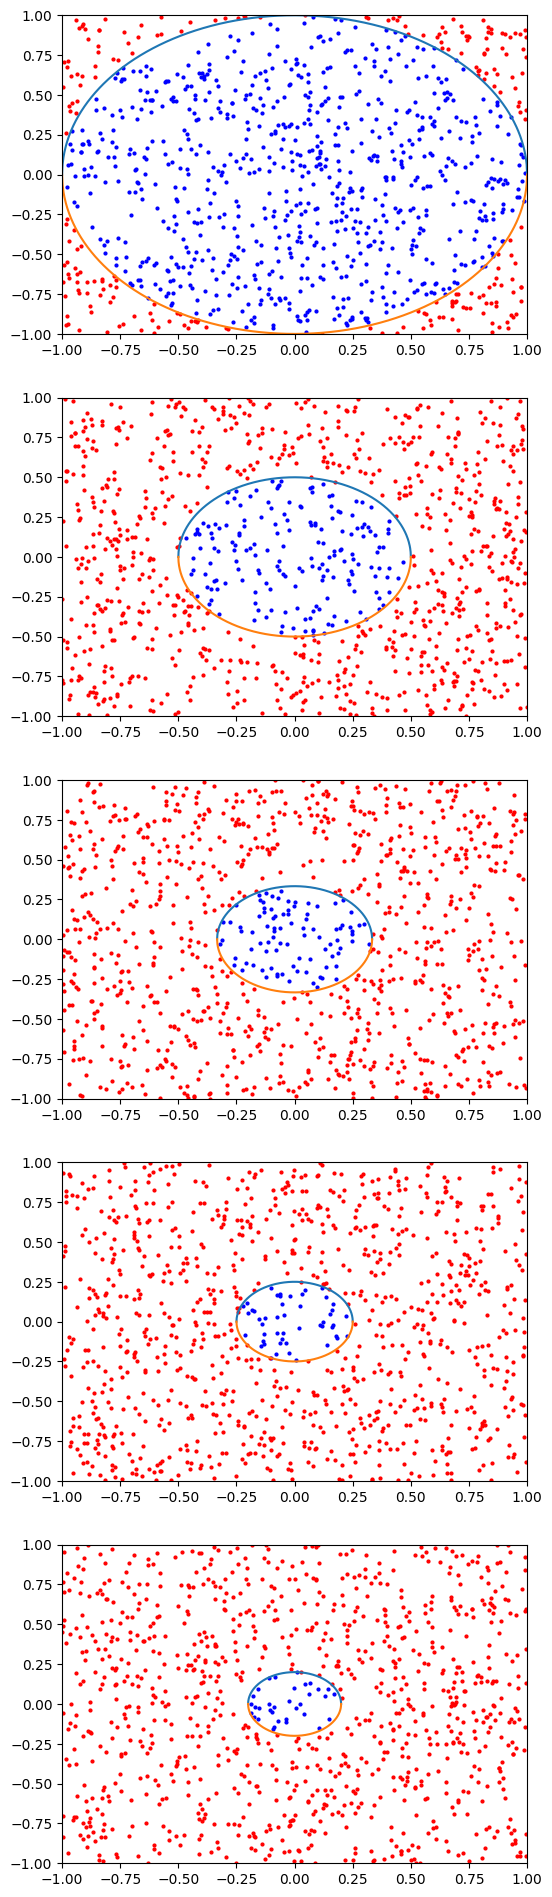

In [5]:
x = np.linspace(-A_SCALAR, A_SCALAR, N)
random_generator = np.random.default_rng()

fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

hit_point_count = np.zeros(MIN_COUNT_RADII)

for i in range(MIN_COUNT_RADII):
    x_loc = np.linspace(-radii[i], radii[i], N)
    y1 = np.sqrt(np.power(radii[i], 2) - np.power(x_loc, 2))
    y2 = -np.sqrt(np.power(radii[i], 2) - np.power(x_loc, 2))
    axs[i].plot(x_loc, y1)
    axs[i].plot(x_loc, y2)
    rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, N)
    rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, N)
    for j in range(N):
        if np.abs(rand_x[j]) > radii[i]:
            axs[i].scatter(rand_x[j], rand_y[j], c="r", s=4)
            continue
        if 0 <= rand_y[j] <= np.sqrt(np.power(radii[i], 2) - np.power(rand_x[j], 2)) or 0 >= rand_y[j] >= -np.sqrt(np.power(radii[i], 2) - np.power(rand_x[j], 2)):
            axs[i].scatter(rand_x[j], rand_y[j], c="b", s=4)
            hit_point_count[i] += 1
        else:
            axs[i].scatter(rand_x[j], rand_y[j], c="r", s=4)
    axs[i].set_xlim(-A_SCALAR, A_SCALAR)
    axs[i].set_ylim(-A_SCALAR, A_SCALAR)

plt.show()

### Построим график pˆ(n), где pˆ — доля точек, которые попали в круг, а n — количество точек
Выбирая значения от 1000 до 256000 мы сможем показать, что чем больше у нас точек, тем точней метод Монте-Карло показывает вероятность => при n -> бесконечности мы практически получаем нашу истинную геометрическую вероятность

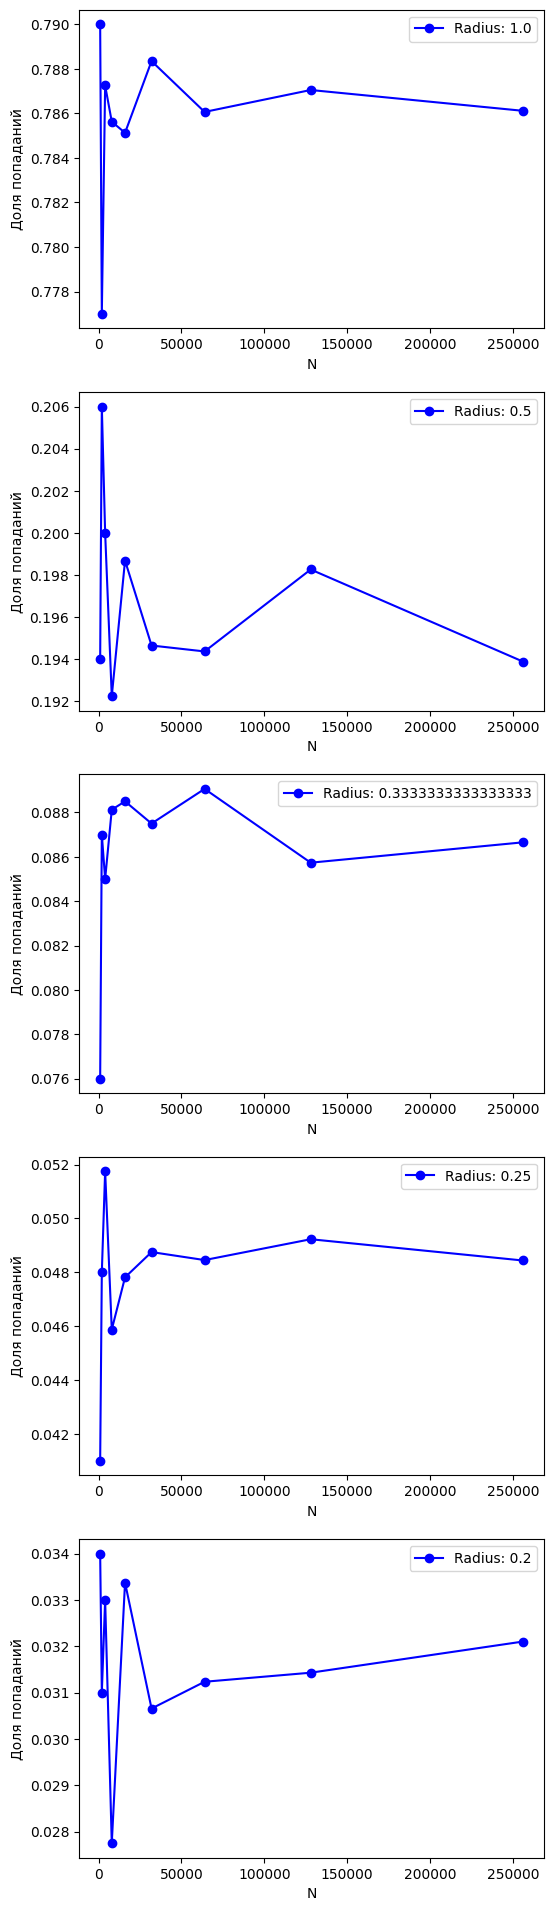

In [6]:
n_test_array = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000]
test_hit_point_array = []
for j in range(len(n_test_array)):
    test_hit_point_count = np.zeros(MIN_COUNT_RADII)
    for i in range(MIN_COUNT_RADII):
        x_loc = np.linspace(-radii[i], radii[i], n_test_array[j])
        y1 = np.sqrt(np.power(radii[i], 2) - np.power(x_loc, 2))
        y2 = -np.sqrt(np.power(radii[i], 2) - np.power(x_loc, 2))
        rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, n_test_array[j])
        rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, n_test_array[j])
        for k in range(n_test_array[j]):
            if np.abs(rand_x[k]) > radii[i]:
                continue
            if 0 <= rand_y[k] <= np.sqrt(np.power(radii[i], 2) - np.power(rand_x[k], 2)) or 0 >= rand_y[k] >= -np.sqrt(np.power(radii[i], 2) - np.power(rand_x[k], 2)):
                test_hit_point_count[i] += 1
    test_hit_point_array.append((test_hit_point_count / n_test_array[j]).tolist())

fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

for i in range(MIN_COUNT_RADII):
    x_vals = []
    y_vals = []
    for j in range(len(n_test_array)):
        x_vals.append(n_test_array[j])
        y_vals.append(test_hit_point_array[j][i])
    axs[i].plot(x_vals, y_vals, marker="o", color="b", label=f"Radius: {radii[i]}")
    axs[i].set_xlabel("N")
    axs[i].set_ylabel("Доля попаданий")
    axs[i].legend()
plt.show()

### Построим график к ε(n) = |pˆ(n)−p| для анализа изменения ошибки оценки геометрической вероятности
При нашей выборки N = {1000...256000} мы можем увидеть, что наша ошибка оценки -> 0 при n -> к бесконечности

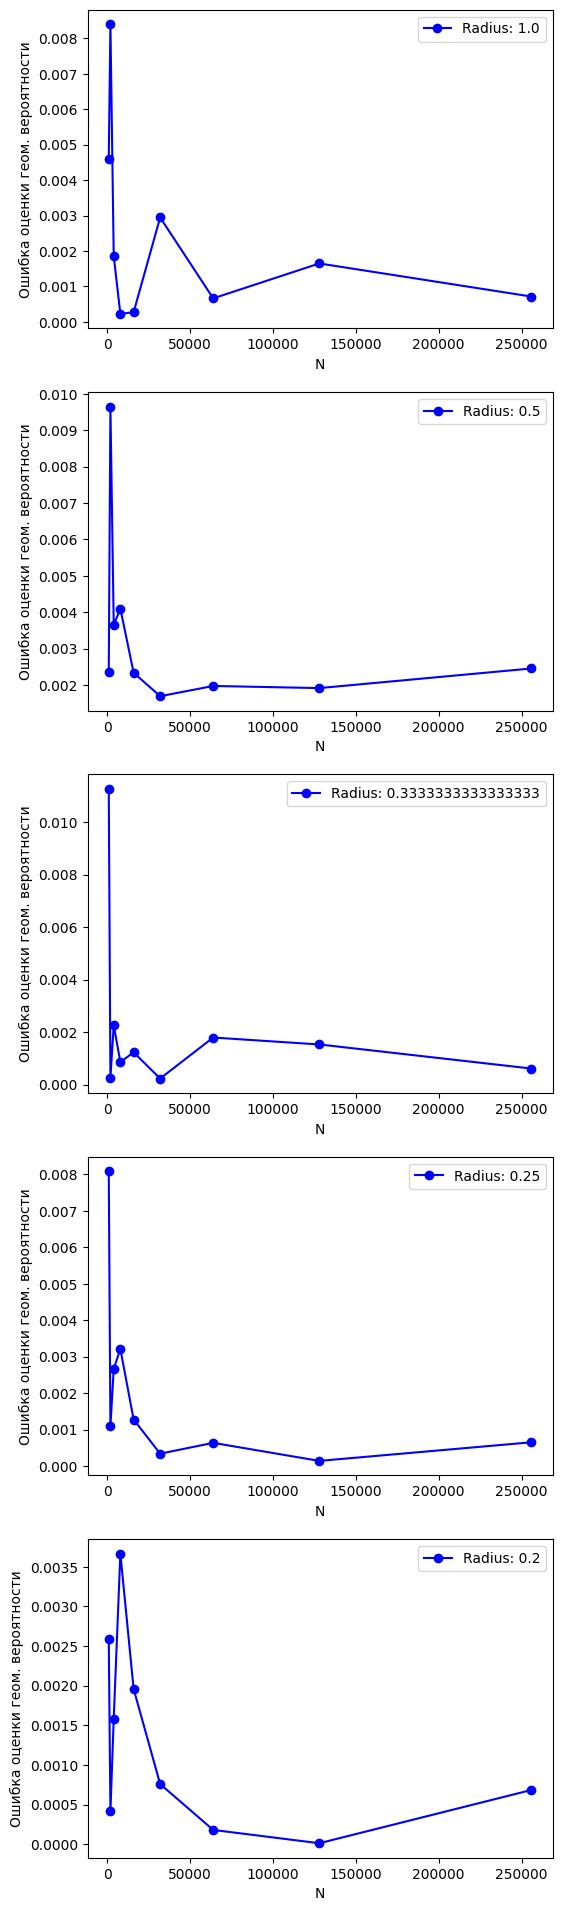

In [7]:
fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

for i in range(MIN_COUNT_RADII):
    x_vals = []
    y_vals = []
    for j in range(len(n_test_array)):
        x_vals.append(n_test_array[j])
        y_vals.append(np.abs(test_hit_point_array[j][i] - true_geom_probability[i]))
    axs[i].plot(x_vals, y_vals, marker="o", color="b", label=f"Radius: {radii[i]}")
    axs[i].set_xlabel("N")
    axs[i].set_ylabel("Ошибка оценки геом. вероятности")
    axs[i].legend()

plt.show()

### Для каждого радиуса вычислим необходимое количество случайных точек N, необходимых для достижения точности ε_i. Построим график зависимости N(ε)
На этом этапе мы просто найдем минимальное N для каждой точности, которую мы укажем. Данная точность показывает, насколько мы хотим точное значение нашей ошибки оценки геометрической вероятности

[0.1, 0.01, 0.001, 0.0001]
[[ 10000.  10000.  10000. 150000.]
 [ 10000.  10000.  20000. 120000.]
 [ 10000.  10000.  20000. 130000.]
 [ 10000.  10000.  50000. 150000.]
 [ 10000.  10000.  30000.  70000.]]


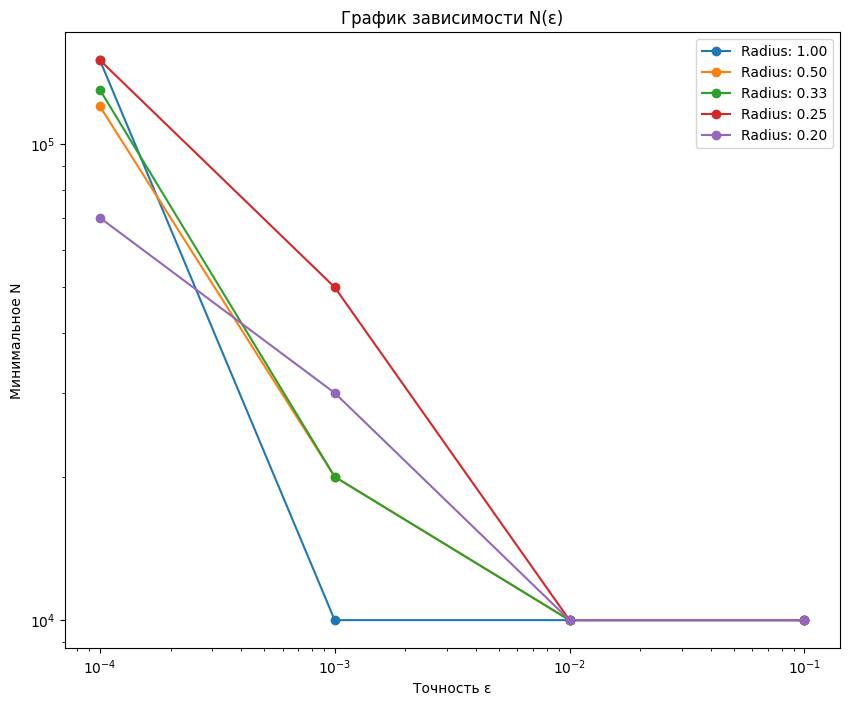

In [17]:
epsilons = [1e-1, 1e-2, 1e-3, 1e-4]
max_n = 1000000
batch_size = 10000

n_results = np.zeros((len(radii), len(epsilons)))

for i, r in enumerate(radii):
    for j, eps in enumerate(epsilons):
        loc_n = batch_size
        hit_count = 0
        found = False
        while loc_n <= max_n and not found:
            rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, batch_size)
            rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, batch_size)
            inside_circle = (np.power(rand_x, 2) + np.power(rand_y, 2)) <= np.power(r, 2)
            hit_count += np.sum(inside_circle)

            probability_hat = hit_count / loc_n
            error = np.abs(probability_hat - true_geom_probability[i])

            if error <= eps:
                n_results[i, j] = loc_n
                found = True
                break

            loc_n += batch_size

plt.figure(figsize=(10, 8))
for i, r in enumerate(radii):
    plt.plot(epsilons, n_results[i], marker='o', label=f"Radius: {r:.2f}")

print(epsilons)
print(n_results)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Точность ε")
plt.ylabel("Минимальное N")
plt.title("График зависимости N(ε)")
plt.legend()
plt.show()

## Заключение
##### Главным выводом в данной лабораторной работе является то, что мы поняли как можно вычислять очень приближенное значение геометрической вероятности. Причем это работает для любых объектов, в нашем случае были довольно простые геометрические объекты, у которых легко считать площадь, но метод Монте-Карло позволяет вычислять геометрическую вероятность для абсолютно любых объектов. Чем больше точек мы добавляем, тем точней получается наше значение вероятности. Тут стоит выбор, если нужно быстро посчитать и не нужно очень точное значение, мы можем брать небольшое количество точек и наоборот, большое количество точек если нам не важна скорость обработки